<h1 style="text-align:center;">T tests</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Typically the goal is to compare to groups, usually the mean.</p>

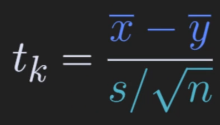
k is the degrees of freedom. In case of k=n-1 we subtract the H0 mean value.
s is sample standard deviation
n is number of data points
<p>Difference of means divided by standard deviation.</p>

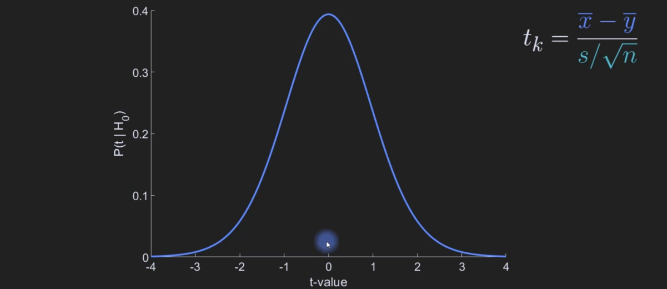

<p>Probability of t values given H0 is true</p>

<h1 style="text-align:center;">One sample T tests</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Test whether a sample could have been drawn from a distribution with a specified mean.</p>
<p>T tests should be used on interval and ratio data, discreet numeric data can be okay too.</p>
<p>We assume the data to be independent from each other and the data is randomly drawn from the dataset.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

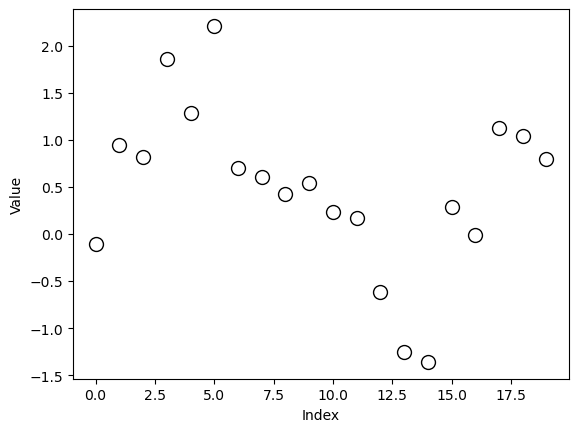

In [2]:
N = 20
populationMean = 0.5
data = np.random.randn(N) + populationMean

plt.plot(data,'ko',markerfacecolor='w',markersize=10)
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

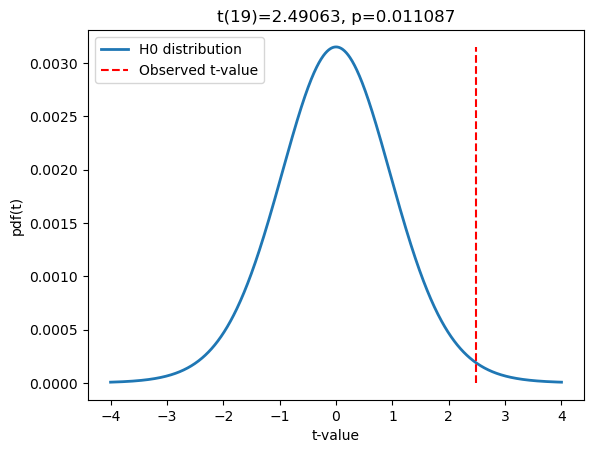

We do not have sufficient evidence to reject H0.


In [3]:
# T testing manually
H0value = 0
t_numerator   = np.mean(data) - H0value
t_denominator = np.std(data) / np.sqrt(N)
t_value       = t_numerator / t_denominator

df = N - 1

# p-value
p = 1 - stats.t.cdf(abs(t_value),df)

x = np.linspace(-4,4,1001)
t_dist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,t_dist,linewidth=2)
plt.plot([t_value,t_value],[0,max(t_dist)],'r--')
plt.legend(('H0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g)=%g, p=%g'%(df,t_value,p))
plt.show()
print('We do not have sufficient evidence to reject H0.')
# What this test shows is that 

In [4]:
t,p = stats.ttest_1samp(data,H0value) # this is two-tailed and dof=N. 
print(f't={t},p={p}')

t=2.427561810404722,p=0.025308853818464993


<h1 style="text-align:center;">Two sample T tests</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>We are testing that two samples are part of the same distribution.</p>
<p>Example would be determine if 6 weeks of social distancing affected people's stress levels.</p>
<p>Properties:</p>
<ul>
    <li><b>Paried or unpaired</b>: Paired means the same individuals report their stress before and after. Unpaired is measuring the stress before and after but on different individuals.</li>
    <li><b>Equal or unequal variance: </b> Whether the two groups have roughly equal variance. Equal variance allows for a simplified formula. Group A are 20 years old male engineering students, group B are 20 years old male computer science students. We can assume roughly same variance. If group B is randomly selected 20 year olds across the world, we cannot assume roughly the same variance. (Equal vs unequal only applies to unpaired groups. Paired groups are equal)</li>
    
</ul>
<p>For t test formulas the numerators are always the same, but the denominators have some variations. For two sample T tests:</p>

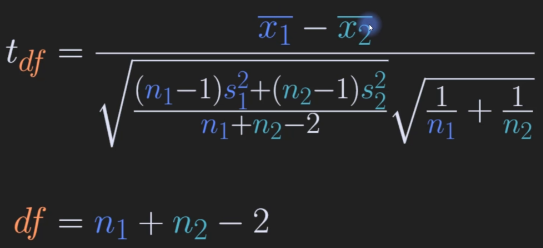

t(6998) = -39.9572, p = 0


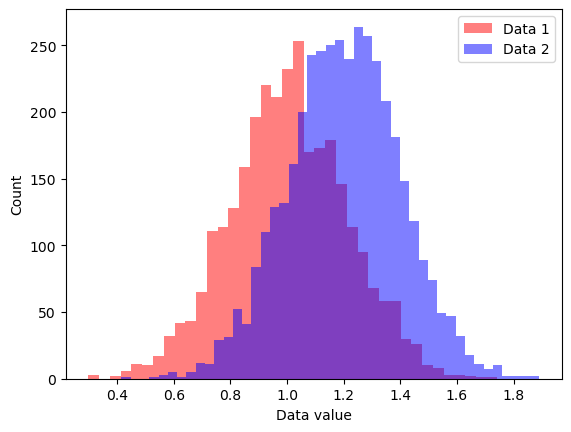

In [5]:
n1    = 3_000
n2    = 4_000
mean1 = 1
mean2 = 1.2

data1 = mean1 + np.random.randn(n1)/5
data2 = mean2 + np.random.randn(n2)/5

t,p = stats.ttest_ind(data1,data2,equal_var=True)
df = n1 + n2 - 2
print('t(%g) = %g, p = %g'%(df,t,p))

plt.hist(data1,bins='fd',color=[1,0,0,0.5],label='Data 1')
plt.hist(data2,bins='fd',color=[0,0,1,0.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

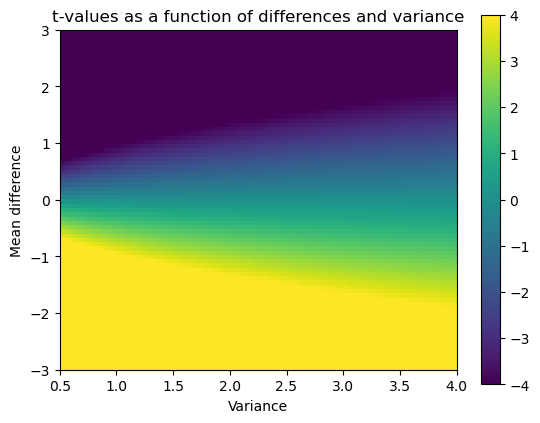

In [6]:
# 2D space of t values

meandiffs = np.linspace(-3,3,80)
pooledvar = np.linspace(.5,4,100)

n1 = 40
n2 = 30
df = n1 + n2 - 2

all_t_vals = np.zeros((len(meandiffs),len(pooledvar)))


for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):
        s = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari] ) / df)
        t_den = s * np.sqrt( (1/n1) + (1/n2) )
        all_t_vals[meani,vari] = meandiffs[meani] / t_den

plt.imshow(all_t_vals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect=.5)
plt.xlabel('Variance')
plt.ylabel('Mean difference')
plt.colorbar()
plt.title('t-values as a function of differences and variance')
plt.show()

<h1 style="text-align:center;">Wilcoxon signed-rank</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>T tests assume that the data is roughly normally distributed. If this criteria is not met, this test is better used. Wilcoxon signed-rank tests are non-parametric.</p>

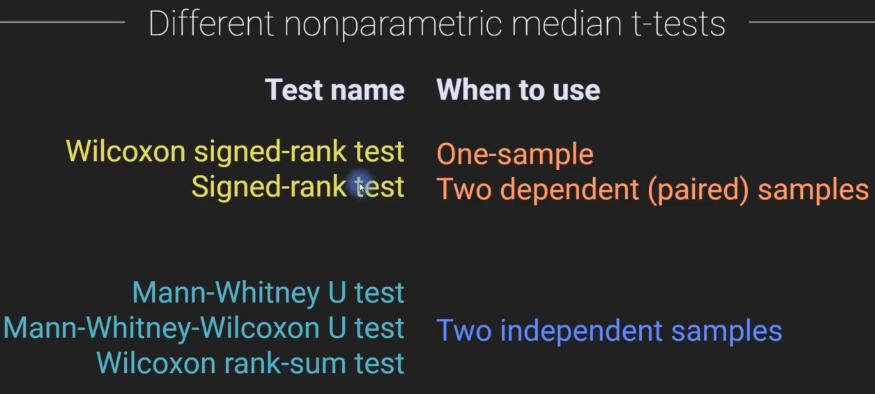

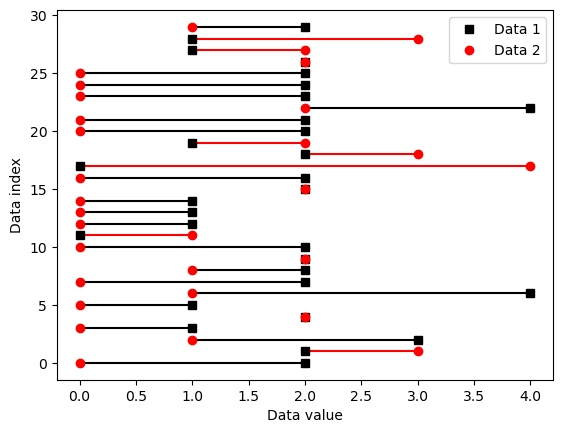

In [20]:
N = 30
data1 = np.random.poisson(1.5,N)
data2 = np.random.poisson(1  ,N) # only integers

colors = 'kr'

for i in range(N):
    plt.plot([data1[i], data2[i]], [i,i], colors[ int(data1[i] < data2[i]) ])

plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='Data 1')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='Data 2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()
plt.show()

In [19]:
t,p = stats.wilcoxon(data1,data2)
print('Wilcoxon z=%g, p=%g'%(t,p))
if p<0.05:
    print('We reject H0 hypothesis')
else:
    print('We accept H0 hypothesis')

Wilcoxon z=103.5, p=0.178828
We accept H0 hypothesis


u=545.5, p=0.787385
We accept H0 hypothesis


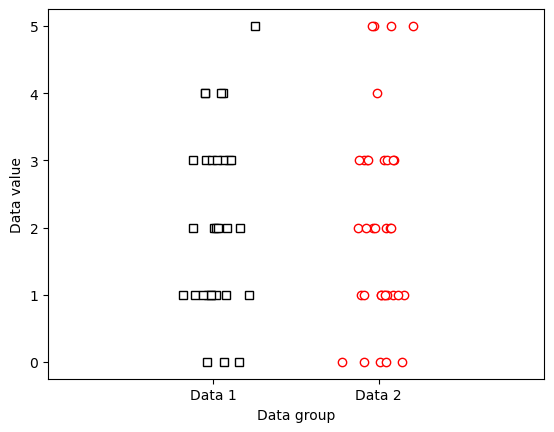

In [34]:
# Mann-Whitney U test

N1 = 30
N2 = 35

data1 = np.random.poisson(2,N1)
data2 = np.random.poisson(2,N2)

u,p = stats.mannwhitneyu(data1,data2)
print('u=%g, p=%g'%(u,p))
if p<0.05:
    print('We reject H0 hypothesis') # It comes from data with different median
else:
    print('We accept H0 hypothesis') # It comes from data with the same median

plt.plot(np.random.randn(N1)/10 + 1,data1,'ks',markerfacecolor='w')
plt.plot(np.random.randn(N2)/10 + 2,data2,'ro',markerfacecolor='w')
plt.xlim([0,3])
plt.xticks([1,2],labels=('Data 1', 'Data 2'))
plt.xlabel('Data group')
plt.ylabel('Data value')
plt.show()

<h1 style="text-align:center;">Permutation testing</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">